In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import scipy.stats as st

In [204]:
home_value_df = pd.DataFrame(pd.read_csv("Resources/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"))
rental_value_df = pd.DataFrame(pd.read_csv("Resources/Metro_ZORI_AllHomesPlusMultifamily_Smoothed.csv"))
sales_count_df = pd.DataFrame(pd.read_csv("Resources/Metro_sales_count_now_uc_sfrcondo_month.csv"))

In [205]:
# get city average house value
home_value_df_insales_count= home_value_df[home_value_df['RegionName'].isin(sales_count_df['RegionName'])]
home_value_df_city = home_value_df_insales_count.set_index('RegionName')
home_value_df_city = home_value_df_city.fillna(method='backfill')
# home_value_df_reindex = home_value_df_reindex.dropna(thresh=((len(home_value_df_reindex.columns) - 5) / 2))
home_value_df_city_test = home_value_df_city.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1).T
home_value_df_city_test['Year'] = home_value_df_city_test.index

In [206]:
# get state average house value
home_value_df_state = home_value_df_insales_count.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
home_value_df_state['StateName'] = home_value_df_state['StateName'].fillna('US')
home_value_df_state = home_value_df_state.fillna(method='backfill')
home_value_df_state = home_value_df_state.groupby(['StateName'])
home_value_df_state_test = round(home_value_df_state.mean(), 2).T
home_value_df_state_test['Year'] = home_value_df_state_test.index

In [207]:
# get city sales count data
sales_count_df_reindex = sales_count_df.set_index('RegionName')
sales_count_df_city_reindex = sales_count_df_reindex.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1).T
sales_count_df_city_final = sales_count_df_city_reindex.fillna(method='ffill')
sales_count_df_city_final['Year'] = sales_count_df_city_final.index

In [208]:
# get state average house value
sales_count_df_state = sales_count_df.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
sales_count_df_state['StateName'] = sales_count_df_state['StateName'].fillna('US')
sales_count_df_state = sales_count_df_state.groupby(['StateName'])
sales_count_df_state_final = round(sales_count_df_state.mean(), 2)
sales_count_df_state_final = (sales_count_df_state_final.fillna(method='ffill')).T
sales_count_df_state_final['Year'] = sales_count_df_city_final.index

In [209]:
home_value_df_city_final = home_value_df_city_test[home_value_df_city_test['Year'].isin(sales_count_df_city_final['Year'])]
home_value_df_state_final = home_value_df_state_test[home_value_df_state_test['Year'].isin(sales_count_df_state_final['Year'])]

In [200]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(sales_count_df_state_final['NY'])

2008-02-29    2012.20
2008-03-31    2197.00
2008-04-30    2447.00
2008-05-31    2579.80
2008-06-30    2779.80
2008-07-31    3355.20
2008-08-31    3091.80
2008-09-30    2853.80
2008-10-31    2641.80
2008-11-30    2078.20
2008-12-31    2164.00
2009-01-31    1530.40
2009-02-28    1275.20
2009-03-31    1552.60
2009-04-30    1633.20
2009-05-31    1909.00
2009-06-30    2259.20
2009-07-31    2773.80
2009-08-31    2895.00
2009-09-30    2792.00
2009-10-31    2740.40
2009-11-30    3142.00
2009-12-31    2797.60
2010-01-31    1931.60
2010-02-28    1568.80
2010-03-31    3533.80
2010-04-30    2186.60
2010-05-31    2374.60
2010-06-30    3401.80
2010-07-31    3049.60
2010-08-31    2382.60
2010-09-30     586.25
2010-10-31    2075.40
2010-11-30    1980.60
2010-12-31    2016.40
2011-01-31    1785.00
2011-02-28    1636.40
2011-03-31    1918.40
2011-04-30    1912.00
2011-05-31    2115.60
2011-06-30    2524.40
2011-07-31    2583.60
2011-08-31    2753.60
2011-09-30    2435.40
2011-10-31    2151.00
2011-11-30

In [33]:
state = input('What state would you like to search for?')
while:
    if (home_value_df_city[home_value_df_city['StateName'] == state]) is False:
        state = input('Try another state')
else:
    print(list(home_value_df_city[home_value_df_city['StateName'] == state].index))

[]


In [40]:
if (home_value_df_city['StateName'] == 'fkalsdjf') is False:
    print(0)
else:
    print(1)
    New York, NY

1


In [202]:
def house_cor(i):
    # plotting city graph
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time')
    ax1.set_ylabel('House Price')
    ax1.bar(home_value_df_city_final[i].index, home_value_df_city_final[i], color='skyblue')
    ax1.set_xticks(np.arange(0, len(home_value_df_city_final['Year']), 12))

    ax2 = ax1.twinx()
    ax2.set_ylabel('Number of Sales')
    ax2.plot(sales_count_df_city_final[i].index, sales_count_df_city_final[i], color='red')
    ax2.set_xticks(np.arange(0, len(home_value_df_city_final['Year']), 12))

    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
    plt.title(f'{i}')
    plt.figure(figsize=(10, 10))
    fig.tight_layout()
    plt.show()

    # plotting state graph
    state = (i.split(', ')[-1])
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time')
    ax1.set_ylabel('House Price')
    ax1.bar(home_value_df_state_final[state].index, home_value_df_state_final[state], color='skyblue')
    ax1.set_xticks(np.arange(0, len(home_value_df_state_final['Year']), 12))

    ax2 = ax1.twinx()
    ax2.set_ylabel('Number of Sales')
    ax2.plot(sales_count_df_state_final[state].index, sales_count_df_state_final[state], color='red')
    ax2.set_xticks(np.arange(0, len(home_value_df_city_final['Year']), 12))

    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
    plt.title(f'{state}')
    plt.figure(figsize=(10, 10))
    fig.tight_layout()
    plt.show()

    correlation = st.pearsonr(home_value_df_city_final[i], sales_count_df_city_final[i])
    round(correlation[0], 2)
    print(round(correlation[0], 2))
    '''slope, inter, r, p, stderr =linregress(np.arange(0, len(home_value_df_city_final['Year'])), home_value_df_city_final['New York, NY'])
    regress_value = np.arange(0, len(home_value_df_city_final['Year'])) * slope + inter
    #regress_equ = f'y = {round(slope, 2)}x + {round(inter, 2)}'
    print(f'The r-value is: {r**2}')
    plt.plot(x, regress_value, color='red')
    #plt.annotate(regress_equ, xy, color='red')
    # slope, inter, r, p, stderr =st.linregress(np.arange(0, len(home_value_df_city_final['Year'])), home_value_df_city_final['New York, NY'])
    regress_value = np.arange(0, len(home_value_df_city_final['Year'])) * slope + inter
    #regress_equ = f'y = {round(slope, 2)}x + {round(inter, 2)}'
    print(f'The r-value is: {r**2}')
    #plt.plot(np.arange(0, len(home_value_df_city_final['Year'])), regress_value, color='red')'''


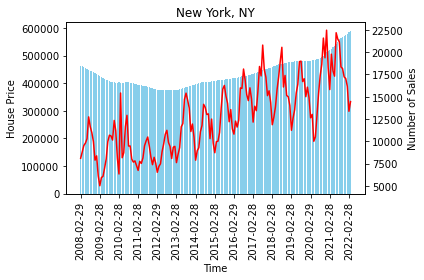

<Figure size 720x720 with 0 Axes>

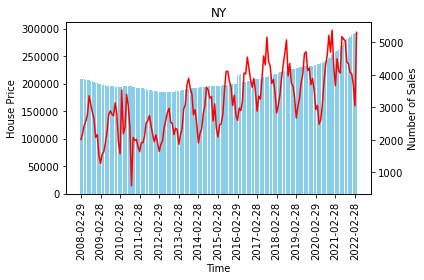

<Figure size 720x720 with 0 Axes>

0.66


In [203]:
house_cor('New York, NY')

In [170]:
sales_count_df_state_final['NY']

2008-02-29    2012.2
2008-03-31    2197.0
2008-04-30    2447.0
2008-05-31    2579.8
2008-06-30    2779.8
               ...  
2021-11-30    4074.0
2021-12-31    4035.8
2022-01-31    3696.6
2022-02-28    3047.0
2022-03-31    5302.0
Name: NY, Length: 170, dtype: float64

In [84]:
test = home_value_df_city_final['Year']
test1 = [time.strptime(i, '%Y-%m-%d') for i in test]
test1
len(home_value_df_city_final['Year'])

267

In [ ]:
df_unpivoted = df.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName'], var_name='date', value_name='price')
df_unpivoted.head()